<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.406539,64.143791,-0.000143,104.550187,104.550405,-0.000218
1,0.0,1.0,23.336420,68.527293,0.000071,101.863784,101.863807,-0.000023
2,0.0,2.0,23.733687,83.341945,0.000213,117.075845,117.075721,0.000124
3,0.0,3.0,75.342756,61.982748,0.000005,147.325508,147.325451,0.000057
4,0.0,4.0,20.423897,23.013132,0.001190,53.438219,53.437143,0.001075
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.687557,70.648758,-0.000264,178.336051,178.336239,-0.000188
249996,999.0,246.0,64.665518,97.952531,0.000137,172.618186,172.618037,0.000150
249997,999.0,247.0,40.769477,80.308673,0.000154,131.078303,131.078166,0.000137
249998,999.0,248.0,31.611579,25.843333,-0.001283,67.453630,67.454919,-0.001290


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.406539,64.143791,-0.000143,104.550187,104.550405,-0.000218
1,0.0,1.0,23.336420,68.527293,0.000071,101.863784,101.863807,-0.000023
2,0.0,2.0,23.733687,83.341945,0.000213,117.075845,117.075721,0.000124
3,0.0,3.0,75.342756,61.982748,0.000005,147.325508,147.325451,0.000057
4,0.0,4.0,20.423897,23.013132,0.001190,53.438219,53.437143,0.001075
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.687557,70.648758,-0.000264,178.336051,178.336239,-0.000188
249996,999.0,246.0,64.665518,97.952531,0.000137,172.618186,172.618037,0.000150
249997,999.0,247.0,40.769477,80.308673,0.000154,131.078303,131.078166,0.000137
249998,999.0,248.0,31.611579,25.843333,-0.001283,67.453630,67.454919,-0.001290


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    30.406539  64.143791 -0.000143  104.550187  104.550405 -0.000218
      1.0    23.336420  68.527293  0.000071  101.863784  101.863807 -0.000023
      2.0    23.733687  83.341945  0.000213  117.075845  117.075721  0.000124
      3.0    75.342756  61.982748  0.000005  147.325508  147.325451  0.000057
      4.0    20.423897  23.013132  0.001190   53.438219   53.437143  0.001075
...                ...        ...       ...         ...         ...       ...
999.0 245.0  97.687557  70.648758 -0.000264  178.336051  178.336239 -0.000188
      246.0  64.665518  97.952531  0.000137  172.618186  172.618037  0.000150
      247.0  40.769477  80.308673  0.000154  131.078303  131.078166  0.000137
      248.0  31.611579  25.843333 -0.001283   67.453630   67.454919 -0.001290
      249.0  56.887751  97.601534  0.000053  164.489337  164.489283  0.000054

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    30.406539  64.143791 -0.000143  104.550187  104.550405 -0.000218
      1.0    23.336420  68.527293  0.000071  101.863784  101.863807 -0.000023
      2.0    23.733687  83.341945  0.000213  117.075845  117.075721  0.000124
      3.0    75.342756  61.982748  0.000005  147.325508  147.325451  0.000057
      4.0    20.423897  23.013132  0.001190   53.438219   53.437143  0.001075
...                ...        ...       ...         ...         ...       ...
999.0 245.0  97.687557  70.648758 -0.000264  178.336051  178.336239 -0.000188
      246.0  64.665518  97.952531  0.000137  172.618186  172.618037  0.000150
      247.0  40.769477  80.308673  0.000154  131.078303  131.078166  0.000137
      248.0  31.611579  25.843333 -0.001283   67.453630   67.454919 -0.001290
      249.0  56.887751  97.601534  0.000053  164.489337  164.489283  0.000054

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.406539,64.143791,-0.000143,104.550187,104.550405,-0.000218
1,0.0,1.0,23.336420,68.527293,0.000071,101.863784,101.863807,-0.000023
2,0.0,2.0,23.733687,83.341945,0.000213,117.075845,117.075721,0.000124
3,0.0,3.0,75.342756,61.982748,0.000005,147.325508,147.325451,0.000057
4,0.0,4.0,20.423897,23.013132,0.001190,53.438219,53.437143,0.001075
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,97.687557,70.648758,-0.000264,178.336051,178.336239,-0.000188
249996,999.0,246.0,64.665518,97.952531,0.000137,172.618186,172.618037,0.000150
249997,999.0,247.0,40.769477,80.308673,0.000154,131.078303,131.078166,0.000137
249998,999.0,248.0,31.611579,25.843333,-0.001283,67.453630,67.454919,-0.001290


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    30.406539  64.143791 -0.000143  104.550187  104.550405 -0.000218
      1.0    23.336420  68.527293  0.000071  101.863784  101.863807 -0.000023
      2.0    23.733687  83.341945  0.000213  117.075845  117.075721  0.000124
      3.0    75.342756  61.982748  0.000005  147.325508  147.325451  0.000057
      4.0    20.423897  23.013132  0.001190   53.438219   53.437143  0.001075
...                ...        ...       ...         ...         ...       ...
999.0 245.0  97.687557  70.648758 -0.000264  178.336051  178.336239 -0.000188
      246.0  64.665518  97.952531  0.000137  172.618186  172.618037  0.000150
      247.0  40.769477  80.308673  0.000154  131.078303  131.078166  0.000137
      248.0  31.611579  25.843333 -0.001283   67.453630   67.454919 -0.001290
      249.0  56.887751  97.601534  0.000053  164.489337  164.489283  0.000054

[250000 rows x 6 columns]

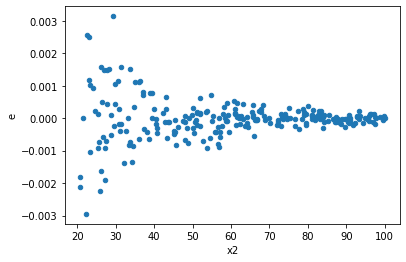

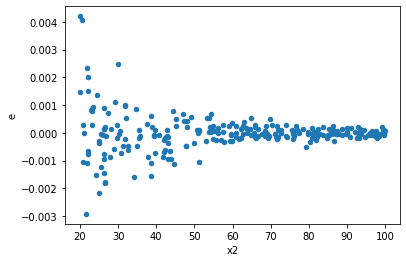

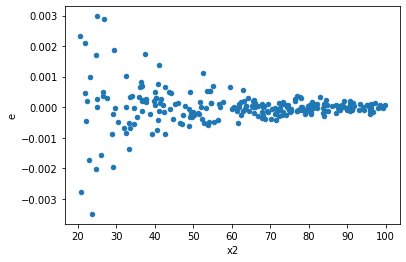

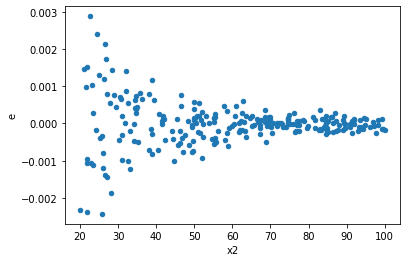

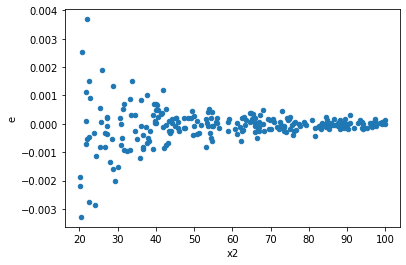

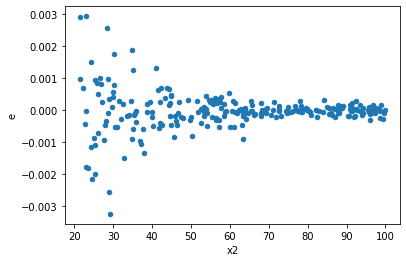

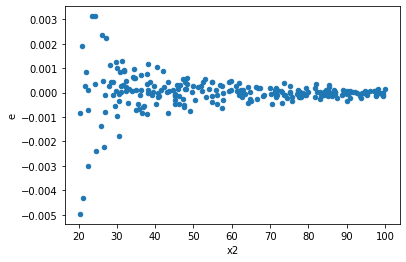

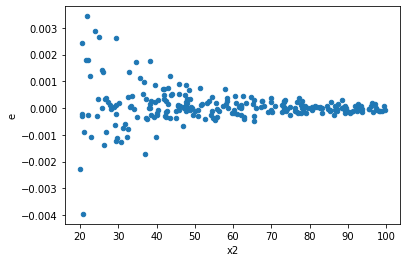

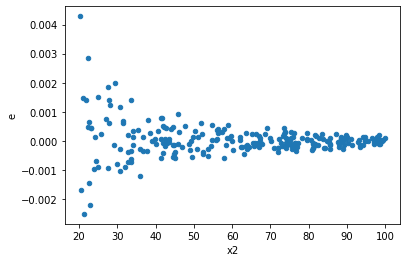

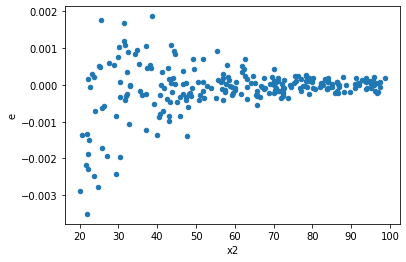

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,8.061970285511133e-05,7.819330053439768e-06,8.226500291337891e-07,7.978908217795681e-08,0.09699031100986026,7.914836741014388e-26,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,9.443628613654679e-05,6.472210914525375e-06,9.63635572821906e-07,6.604296851556505e-08,0.06853521225058673,4.007628978288996e-32,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,7.278750039153434e-05,5.148307219854255e-06,7.427295958319831e-07,5.253374714136995e-08,0.07073065007261929,1.5431121934431028e-31,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,7.800964448047932e-05,8.671554715895551e-06,7.960167804130543e-07,8.848525220301583e-08,0.11116003378358519,1.8453428282839876e-23,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,8.587627211690918e-05,6.608858526455975e-06,8.762884909888692e-07,6.743733190261199e-08,0.07695791123139216,5.52732664440541e-30,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,7.244840232835594e-05,2.647474646661612e-06,7.392694115138362e-07,2.701504741491441e-08,0.03654289896777204,3.069203576834905e-44,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,9.500389136463225e-05,5.440723185154333e-06,9.694274629044106e-07,5.5517583521982986e-08,0.05726842455613127,1.6692998952052555e-35,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,8.286751672754449e-05,1.103665263680059e-05,8.455869053831071e-07,1.1261890445714888e-07,0.13318430517336952,1.9781093444051224e-20,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,6.869126472663248e-05,4.374453866362624e-06,7.009312727207397e-07,4.463728435063902e-08,0.06368282610272849,1.697455778239505e-33,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64